This notebook reproduces plots in Figure 5.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy.stats as stats
import seaborn as sns
import h5py
import pickle
import statsmodels.stats.multitest as smm

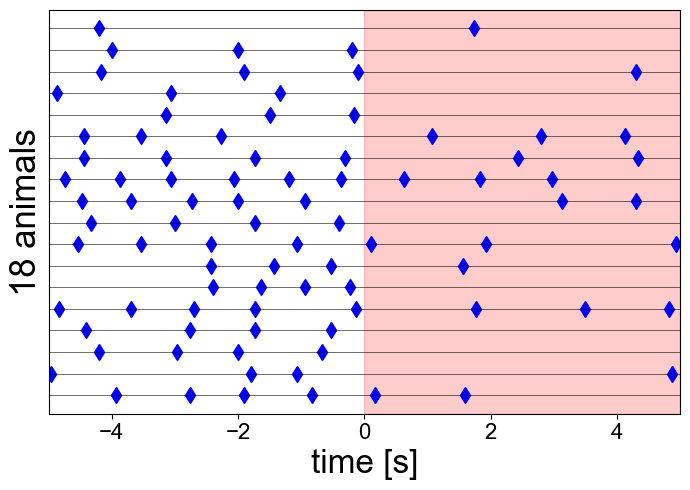

In [2]:
#Fig 5D
with open('../data/Fig5/Fig5D_data/A02lsplit1_CsCh_ATRplus_crawl_timings_data.pkl', 'rb') as f:
    crawling_timings_experimental = pickle.load(f)
plt.rcParams['font.family'] ='Arial'
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
for i in range(18):
    plt.plot(crawling_timings_experimental[i], 0.1*i*np.ones(len(crawling_timings_experimental[i])), 'd', markersize=8, c='b')
    plt.axhline(0.1*i, color='k', lw=0.4)

plt.ylabel(f'18 animals', fontsize=25)
plt.xlabel('time [s]', fontsize=24)
plt.xticks(fontsize=20)
plt.xlim(-5,5)

ax.tick_params(labelleft=False, left=False)
plt.xticks(fontsize=16)
ax.axvspan(0, 5, color=(1, 0, 0, 0.2))
plt.tight_layout()
plt.savefig('figures/Fig5D.svg')

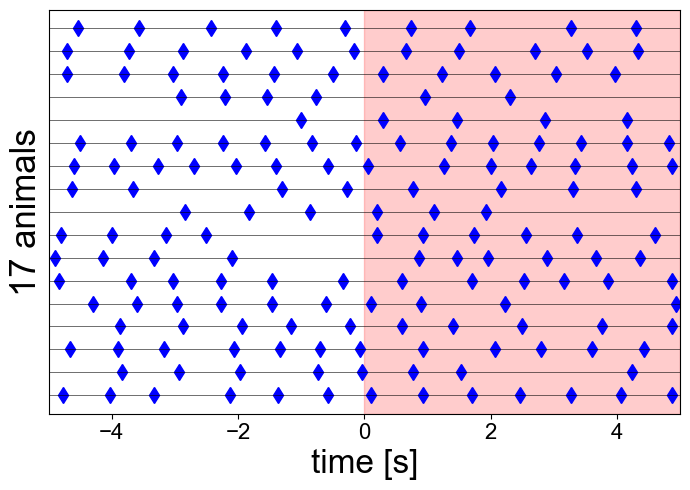

In [3]:
#Fig 7E
with open('../data/Fig5/Fig5E_data/w_CsCh_ATRplus_crawl_timings_data.pkl', 'rb') as f:
    crawling_timings_effector = pickle.load(f)
plt.rcParams['font.family'] ='Arial'
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
for i in range(17):
    plt.plot(crawling_timings_effector[i], 0.1*i*np.ones(len(crawling_timings_effector[i])), 'd', markersize=8, c='b')
    plt.axhline(0.1*i, color='k', lw=0.4)

plt.ylabel(f'17 animals', fontsize=25)
plt.xlabel('time [s]', fontsize=24)
plt.xticks(fontsize=20)
plt.xlim(-5,5)

ax.tick_params(labelleft=False, left=False)
plt.xticks(fontsize=16)
ax.axvspan(0, 5, color=(1, 0, 0, 0.2))
plt.tight_layout()
plt.savefig('figures/Fig5E.svg')

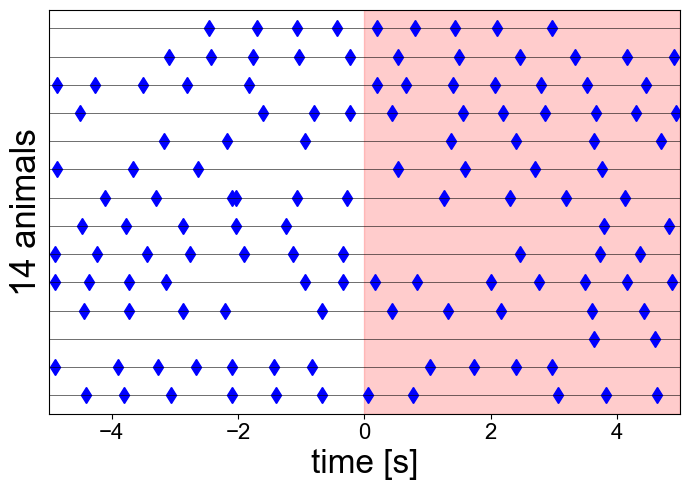

In [4]:
#Fig 7F
with open('../data/Fig5/Fig5F_data/A02lsplit1_CsCh_ATRminus_crawling_timings.pkl', 'rb') as f:
    crawling_timings_ATRminus = pickle.load(f)
plt.rcParams['font.family'] ='Arial'
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111)
for i in range(14):
    plt.plot(crawling_timings_ATRminus[i], 0.1*i*np.ones(len(crawling_timings_ATRminus[i])), 'd', markersize=8, c='b')
    plt.axhline(0.1*i, color='k', lw=0.4)

plt.ylabel(f'14 animals', fontsize=25)
plt.xlabel('time [s]', fontsize=24)
plt.xticks(fontsize=20)
plt.xlim(-5,5)

ax.tick_params(labelleft=False, left=False)
plt.xticks(fontsize=16)
ax.axvspan(0, 5, color=(1, 0, 0, 0.2))
plt.tight_layout()
plt.savefig('figures/Fig5F.svg')

Fig 7G

In [5]:
#preparin data for summary figure
# crawl_before: number of crawls before light ON (in -5 to 0s)
# crawl_after: number of crawls after light ON (in 0 to 5s
A02l_CsCh_ATR_plus_before=[]
A02l_CsCh_ATR_plus_after=[]
for individual in crawling_timings_experimental:
    A02l_CsCh_ATR_plus_before.append(np.sum(individual<0))
    A02l_CsCh_ATR_plus_after.append(np.sum(individual>0))
A02l_CsCh_ATR_plus_after=np.array(A02l_CsCh_ATR_plus_after)
A02l_CsCh_ATR_plus_before=np.array(A02l_CsCh_ATR_plus_before)


A02l_CsCh_ATR_minus_before=[]
A02l_CsCh_ATR_minus_after=[]
for individual in crawling_timings_ATRminus:
    A02l_CsCh_ATR_minus_before.append(np.sum(individual<0))
    A02l_CsCh_ATR_minus_after.append(np.sum(individual>0))
A02l_CsCh_ATR_minus_after=np.array(A02l_CsCh_ATR_minus_after)
A02l_CsCh_ATR_minus_before=np.array(A02l_CsCh_ATR_minus_before)

w_CsCh_ATR_plus_before=[]
w_CsCh_ATR_plus_after=[]
for individual in crawling_timings_effector:
    w_CsCh_ATR_plus_before.append(np.sum(individual<0))
    w_CsCh_ATR_plus_after.append(np.sum(individual>0))
w_CsCh_ATR_plus_after=np.array(w_CsCh_ATR_plus_after)
w_CsCh_ATR_plus_before=np.array(w_CsCh_ATR_plus_before)

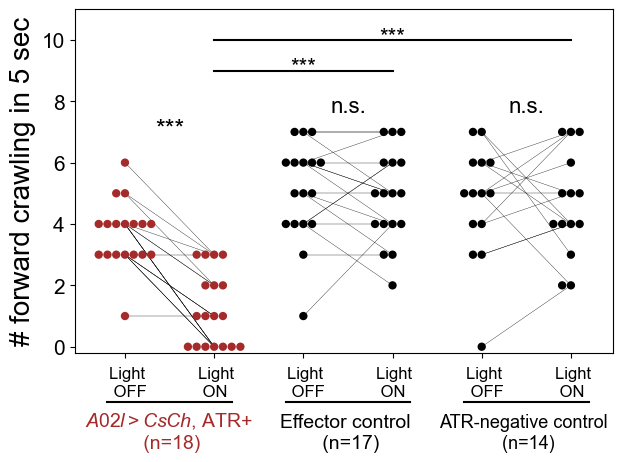

In [6]:
#Fig 7G
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'Arial'
plt.rcParams['mathtext.it'] = 'Arial:italic'
plt.rcParams['font.family'] = 'Arial'
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax = sns.swarmplot(data=[A02l_CsCh_ATR_plus_before, A02l_CsCh_ATR_plus_after, 
                         w_CsCh_ATR_plus_before, w_CsCh_ATR_plus_after, 
                         A02l_CsCh_ATR_minus_before, A02l_CsCh_ATR_minus_after], palette=["brown", "brown", "k", "k", 'k', 'k'], size=6)

plt.plot([np.zeros(len(A02l_CsCh_ATR_plus_before)), np.ones(len(A02l_CsCh_ATR_plus_after))],
         [A02l_CsCh_ATR_plus_before, A02l_CsCh_ATR_plus_after], c='k', lw=0.25)
plt.plot([np.ones(len(w_CsCh_ATR_plus_before))*2, np.ones(len(w_CsCh_ATR_plus_after))*3],
         [w_CsCh_ATR_plus_before, w_CsCh_ATR_plus_after], c='k', lw=0.25)
plt.plot([np.ones(len(A02l_CsCh_ATR_minus_before))*4, np.ones(len(A02l_CsCh_ATR_minus_after))*5],
         [A02l_CsCh_ATR_minus_before, A02l_CsCh_ATR_minus_after], c='k', lw=0.25)
for i in range (3):
    plt.text(-0.18+2*i,-1.6, 'Light \n OFF', fontsize=12)
    plt.text(-0.18+1+2*i,-1.6, 'Light \n ON', fontsize=12)
    ax.plot([-0.2+2*i,-0.2+2*i,1.2+2*i,1.2+2*i], [-1.8,-1.8,-1.8,-1.8], lw=1.5, c='k', clip_on=False)
plt.text(0.5,-3.3, '$\it{A02l > CsCh}$, ATR+ \n (n=18)', c='brown', fontsize=14, horizontalalignment="center")
plt.text(2.5,-3.3, 'Effector control \n (n=17)', fontsize=14, horizontalalignment="center")
plt.text(4.5,-3.3, 'ATR-negative control \n (n=14)', fontsize=13, horizontalalignment="center")


x1, x2 = 0, 1
y, h, col = A02l_CsCh_ATR_plus_before.max() + 0.5, 0, 'k'
#ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h+0.2, "***", ha='center', va='bottom', color=col,  fontsize=18)

x1, x2 = 2, 3
y, h, col = w_CsCh_ATR_plus_before.max() + 0.5, 0, 'k'
ax.text((x1+x2)*.5, y, "n.s.", ha='center', va='bottom', color=col,  fontsize=16)

x1, x2 = 4, 5
y, h, col = A02l_CsCh_ATR_minus_before.max() + 0.5, 0, 'k'
ax.text((x1+x2)*.5, y, "n.s.", ha='center', va='bottom', color=col,  fontsize=16)

ax.text(2, 8.8, "***", ha='center', va='bottom', color=col,  fontsize=16, horizontalalignment='center')
ax.plot([1, 1, 3, 3], [9,9,9,9], lw=1.5, c=col)

ax.text(3,9.8, "***", ha='center', va='bottom', color=col,  fontsize=16, horizontalalignment='center')
ax.plot([1, 1, 5, 5], [10,10,10,10], lw=1.5, c=col)

plt.ylim(-0.2, 11)
plt.gca().axes.xaxis.set_ticklabels([]) #delete numbers in xticks
plt.yticks(fontsize=15)
plt.ylabel('# forward crawling in 5 sec', fontsize=20)
plt.tight_layout()
plt.savefig('figures/Fig5G.svg')

Quantification of Fig7G

In [7]:
s,p=stats.wilcoxon(A02l_CsCh_ATR_plus_before, A02l_CsCh_ATR_plus_after)
print('A02l > CsCh, ATR+ OFF vs ON: ', p)


A02l > CsCh, ATR+ OFF vs ON:  0.00037794449539400415


In [8]:
s,p=stats.wilcoxon(w_CsCh_ATR_plus_before, w_CsCh_ATR_plus_after)
print('Effector control, ATR+ OFF vs ON: ', p)

Effector control, ATR+ OFF vs ON:  0.6823177689674893


In [9]:
s,p=stats.wilcoxon(A02l_CsCh_ATR_minus_before, A02l_CsCh_ATR_minus_after)
print('A02l > CsCh, ATR- OFF vs ON: ', p)

A02l > CsCh, ATR- OFF vs ON:  0.9435398814024542


In [10]:
s1,p1=stats.mannwhitneyu(A02l_CsCh_ATR_plus_after, w_CsCh_ATR_plus_after)
s2,p2=stats.mannwhitneyu(A02l_CsCh_ATR_plus_after, A02l_CsCh_ATR_minus_after)
s3,p3=stats.mannwhitneyu(w_CsCh_ATR_plus_after, A02l_CsCh_ATR_minus_after)
corrected_p_values = smm.multipletests([p1,p2,p3], alpha=0.05, method='holm') # Holm-bonferoni correction
print('A02l > CsCh, ATR+ ON vs Effector control ATR+ ON: ', p1)
print('A02l > CsCh, ATR+ ON vs A02l > CsCh ATR- ON: ', p2)
print('Effector control ATR+ ON vs A02l > CsCh ATR- ON: ', p3)

A02l > CsCh, ATR+ ON vs Effector control ATR+ ON:  1.876153968346849e-06
A02l > CsCh, ATR+ ON vs A02l > CsCh ATR- ON:  1.5397190077090215e-05
Effector control ATR+ ON vs A02l > CsCh ATR- ON:  0.7004945876547743
